# NLP project

ID's : 205918980, 206066326, 313612152

## Import's

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# ignor wornings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import warnings
warnings.filterwarnings("ignore")   

# tensorflow lib
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GRU, Dense, Flatten, Bidirectional 

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# nlp tools
import string
import re
import nltk 

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
tf.__version__

'2.6.2'

In [3]:
# import data
df = pd.read_csv("../input/amazon-fine-food-reviews/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Spliting the scor to 1 and 0 (positive or negative review).

In [4]:
df.loc[(df.Score <= 3)  , "Score"] = 0
df.loc[(df.Score >= 4)  , "Score"] = 1

AxesSubplot(0.125,0.125;0.775x0.755)


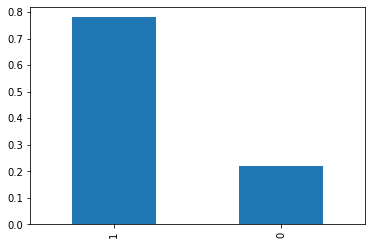

In [5]:
# prints wheter a review is positive (1) or negative (0)
print(round(df.Score.value_counts()/df.Score.size,2).plot.bar())

plt.show()

In [6]:
# Check if there are any null values and drop them
print(df.isnull().sum())
df = df.dropna().reset_index()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [7]:
# balance the data!
good = df[df['Score'] == 1]
bad =  df[df['Score'] == 0]

In [8]:
#Set data size ans suffel 
datasize = 200000
result = pd.concat([bad[:int(datasize/2)],good[:int(datasize/2)]])
data = result.sample(frac=1).reset_index(drop=True)
data

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,12373,12374,B000F5429A,A13NW8G2B4MLKG,Janice K. Terrell,4,4,1,1297814400,LOVE those Sugar-free Werther's !!!,I am so excited to find that I can purchase Su...
1,115314,115315,B000F4F952,ARBS124NVEJUV,SuzyB,0,0,1,1348790400,Great tea,Love this tea...drink it every morning! I alte...
2,76715,76716,B0049ULB78,A1T4XNA6LM3EYS,Joe Smith,0,1,0,1338076800,Undrinkable,"Wow, this stuff is nasty. I'm glad I only orde..."
3,7879,7880,B004AMLWO2,A3HVBJ268BZIP2,Alex E. Acle,0,0,0,1324080000,Good for cooking,Purchased two liters... looking for an oil to ...
4,7382,7383,B001EPQQL2,A14ZROR1NHBYTO,"DonF ""DonF""",0,0,1,1337299200,best brown sugar replacement,This taste just like brown sugar with less sug...
...,...,...,...,...,...,...,...,...,...,...,...
199995,94969,94970,B0070CGXN4,A35V32HZEGZH04,"W. Easley ""Opa""",1,1,1,1336003200,Soft as a Spring Day,".<br /><br />Recently on a relaxing vacation, ..."
199996,97799,97800,B004PXEZ9K,A371Z04GWURCYC,Rich Dolata Jr.,1,1,1,1329696000,If I ate more than 3/day my stomach was all me...,Was hotter than i thought. Was very good but t...
199997,271344,271345,B00250UD1Y,AKACGHPVILE9R,"Sophronia ""Euphemia""",5,8,0,1314144000,Doesnt Dissolve Well - Evaporated Milk Taste,Purchased this as a good way to serve cream fo...
199998,332491,332492,B001652JCU,A31C61TMDHFJKJ,"K. Palmer ""ernie""",0,0,0,1308873600,Sugar free?,Don't expect this to taste the same as what co...


In [9]:
data.shape

(200000, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   200000 non-null  int64 
 1   Id                      200000 non-null  int64 
 2   ProductId               200000 non-null  object
 3   UserId                  200000 non-null  object
 4   ProfileName             200000 non-null  object
 5   HelpfulnessNumerator    200000 non-null  int64 
 6   HelpfulnessDenominator  200000 non-null  int64 
 7   Score                   200000 non-null  int64 
 8   Time                    200000 non-null  int64 
 9   Summary                 200000 non-null  object
 10  Text                    200000 non-null  object
dtypes: int64(6), object(5)
memory usage: 16.8+ MB


# NLP

In [11]:
stop_words = stopwords.words('english')
stop_words = stop_words[:100]

In [12]:
ps = PorterStemmer()
count = 0
def Deal_with_sentence(x):
    global count 
    x = re.sub('\d', ' ', x) #Removes Digits
    x = re.sub('<.*?>', ' ', x) #Removes Html tags
    x = x.translate(str.maketrans('', '', string.punctuation)) #Removes Punctuations
    token_sen = word_tokenize(x)
    x = " ".join([ps.stem(word) for word in token_sen if word.lower() not in stop_words])
    count += 1
    if count % 5000 == 0:
        print(count)
    return x

# Process Data

In [13]:
score = data['Score'].copy()
Reviews = data[['Text']].copy()['Text']
Reviews = Reviews.apply(Deal_with_sentence)

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000


In [14]:
Reviews

0         so excit find can purchas sugarfre werther ama...
1         love teadrink everi morn altern throughout day...
2         wow stuff nasti Im glad onli order one box cof...
3         purchas two liter look oil put salad bread etc...
4         tast just like brown sugar less sugar use ever...
                                ...                        
199995    recent relax vacat discov neglect bring favori...
199996    hotter than thought veri good too much jerki a...
199997    purchas good way serv cream coffe tea without ...
199998    dont expect tast same come small oz tin buy lo...
199999    tea great no idea white tea would good will ne...
Name: Text, Length: 200000, dtype: object

# Make vectors

In [15]:
# Make vectors from the reviews and pad with 0's
T = Tokenizer()
T.fit_on_texts(Reviews)
vectors = T.texts_to_sequences(Reviews)

In [16]:
longest_r= 0
for x in vectors:
    longest_r = max(len(x),longest_r)
# padding with 0 
vectors = pad_sequences(vectors, maxlen=longest_r, padding='post')

In [17]:
vectors

array([[    4,   475,    53, ...,     0,     0,     0],
       [   17, 11628,   141, ...,     0,     0,     0],
       [  900,   125,   812, ...,     0,     0,     0],
       ...,
       [   70,     8,    80, ...,     0,     0,     0],
       [   32,   171,     3, ...,     0,     0,     0],
       [   20,    24,    28, ...,     0,     0,     0]], dtype=int32)

# spliting data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(vectors, score, train_size=0.8, random_state=1)

In [19]:
x_train.shape

(160000, 2119)

# Modeling

## RNN with word embading

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2119)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 2119, 60)          5428080   
_________________________________________________________________
bidirectional (Bidirectional (None, 2119, 480)         434880    
_________________________________________________________________
flatten (Flatten)            (None, 1017120)           0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1017121   
Total params: 6,880,081
Trainable params: 6,880,081
Non-trainable params: 0
_________________________________________________________________
None


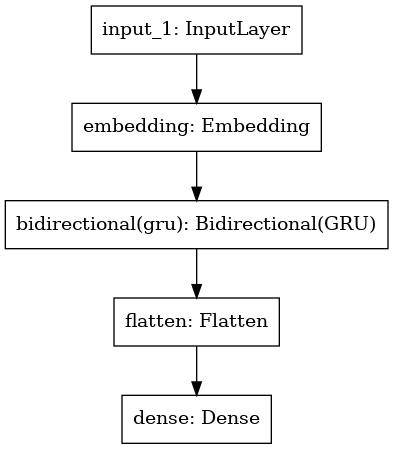

In [20]:
inputs = tf.keras.Input(shape=(longest_r,))

embedding = Embedding(
    input_dim=len(T.word_index) + 1,     #  Integer. Size of the vocabulary, i.e. maximum integer index + 1.
    input_length=longest_r, #Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten
    output_dim=60                        # Integer. Dimension of the dense embedding.
)(inputs)

Bgru = Bidirectional(
    GRU(240, return_sequences=True) # return to output each word that go to the GRU
)(embedding)

flat = Flatten()(Bgru) # flat the matrix (3D to 2D)

outputs = Dense(1, activation='sigmoid')(flat) # Dense with sigmoid to 1 output


model = tf.keras.Model(inputs, outputs) # init the model


print(model.summary())
tf.keras.utils.plot_model(model)

In [21]:
# compilt the model with adam optimizer and binary_crossentropy loss.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fit the model and save as history for ploting
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=10,
    # set EarlyStopping to prevent overfitting and spending time. 
    # if the val_accuracy don't improved for 2 epochs stop, and return to best weight!
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
2000/2000 [==============================] - 661s 329ms/step - loss: 0.3743 - accuracy: 0.8411 - val_loss: 0.3033 - val_accuracy: 0.8794
Epoch 2/10
2000/2000 [==============================] - 658s 329ms/step - loss: 0.2245 - accuracy: 0.9142 - val_loss: 0.2811 - val_accuracy: 0.8932
Epoch 3/10
2000/2000 [==============================] - 658s 329ms/step - loss: 0.1155 - accuracy: 0.9575 - val_loss: 0.3868 - val_accuracy: 0.8811
Epoch 4/10
2000/2000 [==============================] - 630s 315ms/step - loss: 0.0648 - accuracy: 0.9772 - val_loss: 0.4700 - val_accuracy: 0.8845


# Result

In [22]:
# print loss and accurcy for test data
model.evaluate(x_test, y_test)

1250/1250 [==============================] - 107s 86ms/step - loss: 0.2956 - accuracy: 0.8888


[0.2955699563026428, 0.8887500166893005]

In [23]:
y_true = np.array(y_test, dtype=np.int)
y_pred = np.squeeze(np.array(model.predict(x_test) >= 0.5, dtype=np.int))

## F1 and Accuracy Score

In [24]:
f1 = f1_score(y_true, y_pred)
print("F1 score:", round(f1*100,2) , "%")
acc = np.mean(np.array(y_pred == y_true, dtype=np.int))
print("Test accuracy score:", round(acc*100,2) , "%")

F1 score: 88.82 %
Test accuracy score: 88.88 %


## confusion matrix

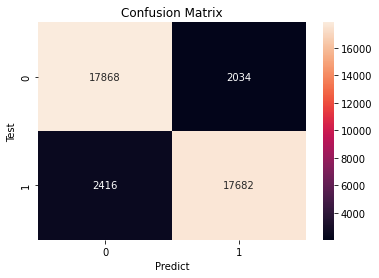

In [25]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm,fmt=".0f", annot=True)
plt.xlabel("Predict")
plt.ylabel("Test")
plt.title("Confusion Matrix")
plt.show()

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

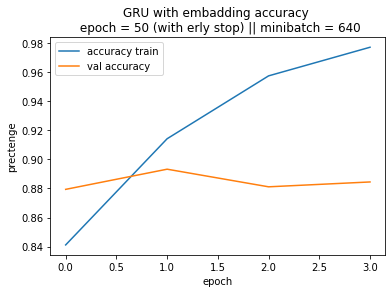

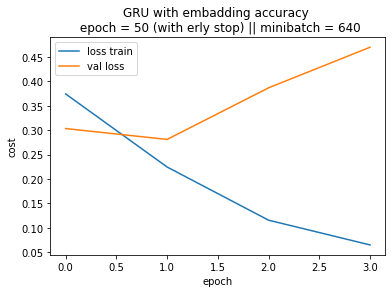

In [27]:
plt.plot(accuracy, label="accuracy train")
plt.plot(val_accuracy, label="val accuracy")
plt.title("GRU with embadding accuracy \n epoch = 50 (with erly stop) || minibatch = 640")
plt.ylabel("prectenge")
plt.xlabel("epoch")
plt.legend()
plt.show()



plt.plot(loss, label = "loss train")
plt.plot(val_loss, label = "val loss")
plt.title("GRU with embadding accuracy \n epoch = 50 (with erly stop) || minibatch = 640")
plt.ylabel("cost")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Example of classification

In [28]:
ans = Deal_with_sentence(
    "The power button does not do a clean shutdown. The developers know about this and have decided to claim their definition of \"safe\" justifies the false-advertising.The thermals looked reasonable out of the box but I wanted to use my preferred thermal paste and discovered there was some black adhesive residue on the CPU where the pad they were using was pink with no adhesive on it . Their Pi's might have those stick-on heat-sinks that they are removing but they are not cleaning the surface before assembly.")
ans = T.texts_to_sequences([ans])
ans = pad_sequences(ans, maxlen=longest_r, padding='post')
if(np.squeeze(model.predict(ans))>0.5):
    print("This is positive review!")
else:
    print("This is negetiv review!")
    
    
np.squeeze(model.predict(ans))

This is negetiv review!


array(0.00179333, dtype=float32)